In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [13]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

<H2>after loading library lets move to make the project fast like basic null value cheaking<h2>


In [14]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [15]:
df.isnull().sum()

,0
Category,0
Resume,0


<H1>EDA<H1>

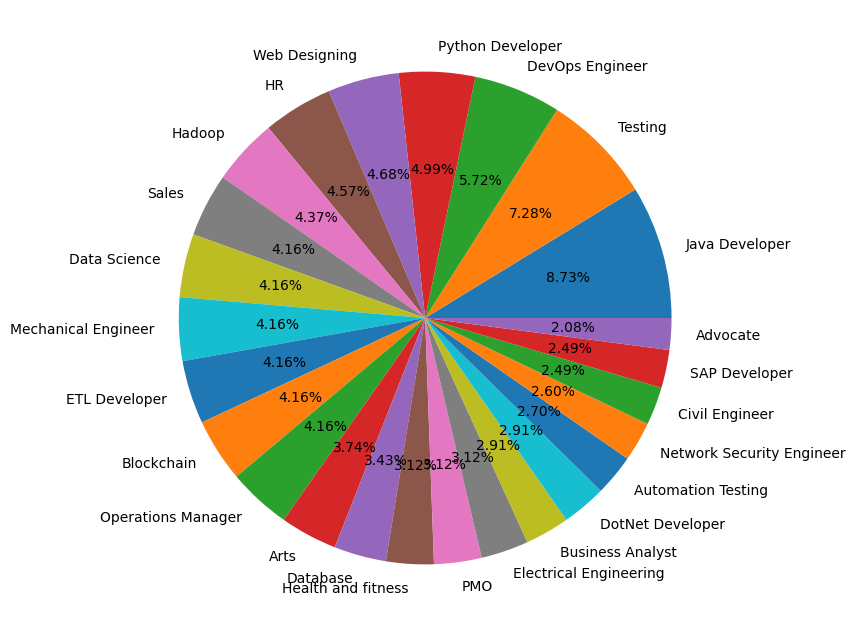

In [16]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.pie(df["Category"].value_counts(),labels=df["Category"].value_counts().index,autopct="%1.2f%%")
plt.show()

In [17]:
Catagory_list=df['Category'].unique()
Catagory_list


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

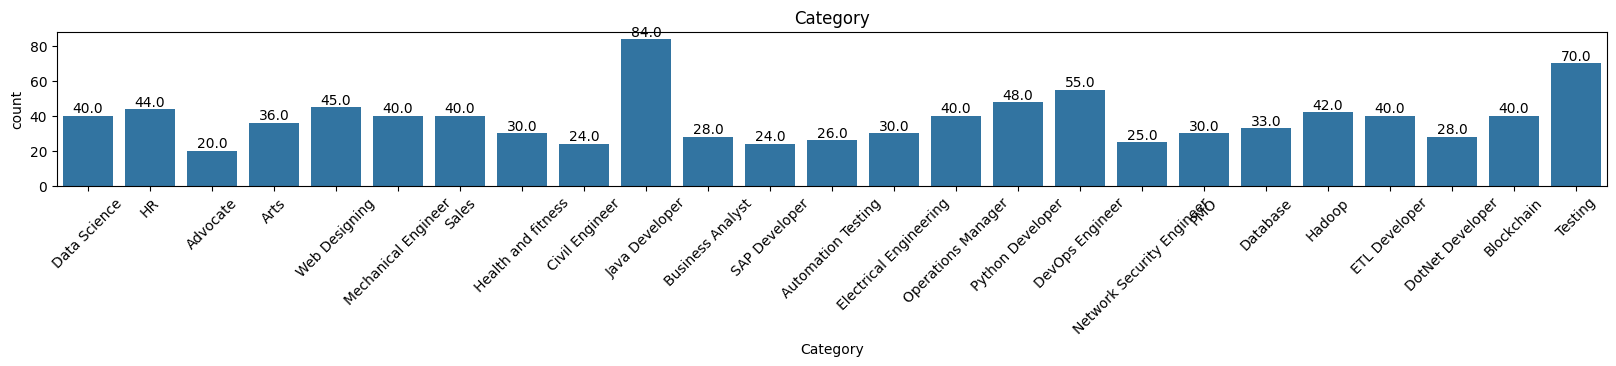

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,2))
plt.xticks(rotation=45)
plt.title("Category")

ax = sns.countplot(x="Category", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()

<h1>nlp preprocessing techniques <h1>
removing special charactors
making into lower
special chartors removels

In [19]:

import re
import string

def clean_resume_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()

    return text


df['Resume']= df['Resume'].apply( clean_resume_text)

In [20]:
df['Resume'][0]


'skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm naã¯ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the rev

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Category"]=le.fit_transform(df["Category"])

In [22]:
label_numbers = [6, 12, 0, 1, 24, 16, 22, 14, 5, 15, 4, 21, 2, 11, 18, 20, 8,
                 17, 19, 7, 13, 10, 9, 3, 23]

category_names = [
    'Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
    'Mechanical Engineer', 'Sales', 'Health and fitness',
    'Civil Engineer', 'Java Developer', 'Business Analyst',
    'SAP Developer', 'Automation Testing', 'Electrical Engineering',
    'Operations Manager', 'Python Developer', 'DevOps Engineer',
    'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
    'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'
]

label_to_category = {num: name for num, name in zip(label_numbers, category_names)}


stop words removels


In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)


df['Resume'] = df['Resume'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


spelling corrections

In [24]:

df_tokens = df['Resume'].str.split()


In [25]:
import nltk
nltk.download('punkt_tab')

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()


protected_words = {
    "python", "java", "javascript", "c++", "c#", "html", "html5", "css",
    "sql", "mysql", "mongodb", "react", "nodejs", "django", "flask",
    "tensorflow", "pytorch", "keras", "nlp", "ai", "ml", "devops",
    "aws", "azure", "gcp", "linux", "docker", "kubernetes", "firebase"
}

def resume_stemming(text):
    if not isinstance(text, str):
        return ""

    words = word_tokenize(text)
    stemmed_words = []

    for w in words:
        lw = w.lower()

        if lw in protected_words:
            stemmed_words.append(lw)
        else:
            stemmed_words.append(ps.stem(lw))

    return " ".join(stemmed_words)
df['Resume'] = df['Resume'].apply(resume_stemming)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [26]:
df.head()

,Category,Resume
0,6,skill program languag python panda numpi scipi...
1,6,educ detail may 2013 may 2017 uitrgpv data sci...
2,6,area interest deep learn control system design...
3,6,skill â¢ r â¢ python â¢ sap hana â¢ tablea...
4,6,educ detail mca ymcaust faridabad haryana data...


In [27]:
import pandas as pd

category_top_words = []

for category in df["Category"].unique():

    cat_df = df[df["Category"] == category]
    text = " ".join(cat_df["Resume"].astype(str))

    # Split into words
    words = text.split()

    # Count manually
    word_count = {}
    for w in words:
        word_count[w] = word_count.get(w, 0) + 1

    # Sort by frequency
    sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

    # Take top 30
    top_30 = sorted_words[:30]

    # Store results
    for word, count in top_30:
        category_top_words.append([category, word, count])

# Convert to DataFrame
top30_df = pd.DataFrame(category_top_words, columns=["Category", "Word", "Count"])
top30_df

,Category,Word,Count
0,6,data,392
1,6,exprienc,248
2,6,month,244
3,6,â¢,228
4,6,learn,212
...,...,...,...
745,23,1,80
746,23,manag,80
747,23,assembl,80
748,23,pvt,70


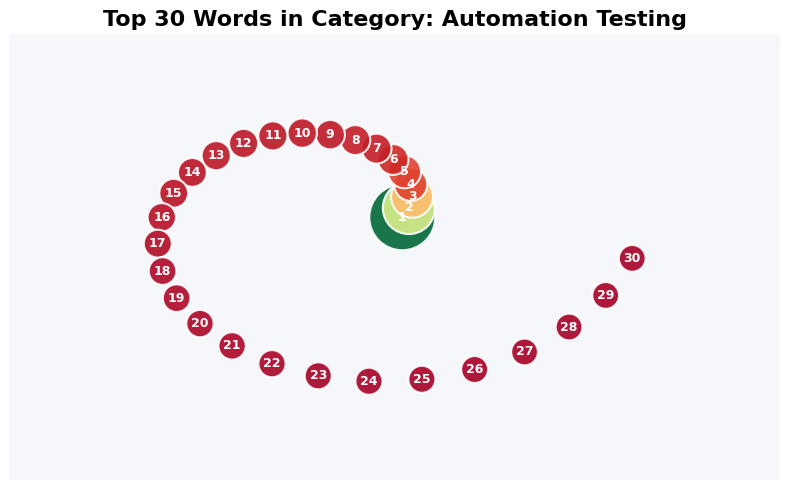

Legend for category: 2
 1. test (744)
 2. â¢ (474)
 3. autom (294)
 4. develop (160)
 5. â¢ (160)
 6. case (128)
 7. compani (116)
 8. descript (116)
 9. design (108)
10. use (108)
11. project (104)
12. script (104)
13. qtp (104)
14. system (100)
15. exprienc (100)
16. month (94)
17. respons (88)
18. detail (84)
19. good (84)
20. team (80)
21. integr (80)
22. involv (78)
23. softwar (76)
24. tool (76)
25. plan (76)
26. function (74)
27. selenium (72)
28. environ (72)
29. requir (72)
30. bug (72)


In [40]:
import numpy as np
import matplotlib.pyplot as plt

cat = 2

plot_df = (
    top30_df[top30_df["Category"] == cat]
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)

n = len(plot_df)


angles = np.linspace(0, 2 * np.pi, n, endpoint=False)

radii = np.linspace(0.2, 1.0, n)

x = radii * np.cos(angles)
y = radii * np.sin(angles)


sizes = plot_df["Count"].values.astype(float)
sizes_scaled = 2000 * (sizes / sizes.max())**1.2 + 250
norm = (sizes - sizes.min()) / (sizes.max() - sizes.min() + 1e-9)
colors = plt.cm.RdYlGn(norm)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor("#f5f7fa")

sc = ax.scatter(
    x,
    y,
    s=sizes_scaled,
    c=colors,
    alpha=0.9,
    edgecolor="white",
    linewidth=1.5,
)
for i, (xi, yi) in enumerate(zip(x, y), start=1):
    ax.text(
        xi,
        yi,
        str(i),
        ha="center",
        va="center",
        fontsize=9,
        color="white",
        fontweight="bold",
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
ax.set_title(f"Top {n} Words in Category: {label_to_category[cat]}", fontsize=16, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()
print(f"Legend for category: {cat}")
for idx, row in plot_df.iterrows():
    print(f"{idx+1:2d}. {row['Word']} ({row['Count']})")


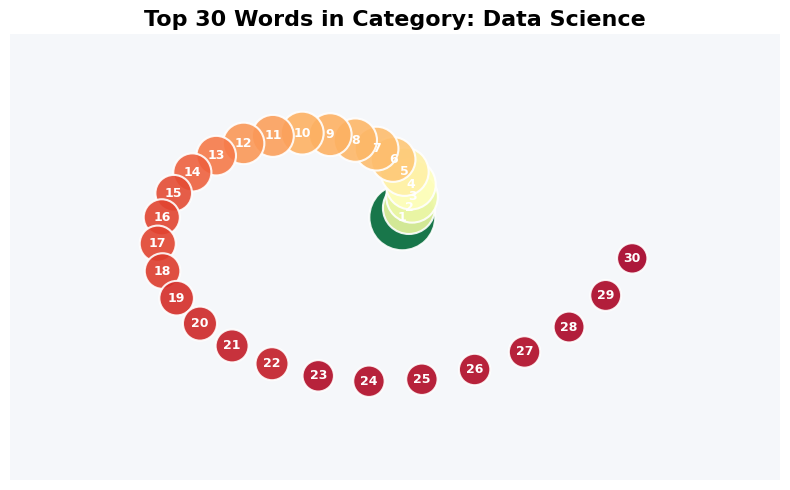

Legend for category: 6
 1. data (392)
 2. exprienc (248)
 3. month (244)
 4. â¢ (228)
 5. learn (212)
 6. year (180)
 7. scienc (172)
 8. python (168)
 9. develop (164)
10. 1 (164)
11. less (156)
12. machin (152)
13. analyt (136)
14. detail (124)
15. use (112)
16. model (108)
17. âª (108)
18. skill (104)
19. project (96)
20. like (92)
21. analysi (84)
22. compani (84)
23. deep (72)
24. descript (72)
25. technolog (72)
26. busi (72)
27. involv (72)
28. engin (68)
29. sap (68)
30. report (64)


In [41]:
import numpy as np
import matplotlib.pyplot as plt

cat = 6

plot_df = (
    top30_df[top30_df["Category"] == cat]
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)

n = len(plot_df)


angles = np.linspace(0, 2 * np.pi, n, endpoint=False)

radii = np.linspace(0.2, 1.0, n)

x = radii * np.cos(angles)
y = radii * np.sin(angles)


sizes = plot_df["Count"].values.astype(float)
sizes_scaled = 2000 * (sizes / sizes.max())**1.2 + 250
norm = (sizes - sizes.min()) / (sizes.max() - sizes.min() + 1e-9)
colors = plt.cm.RdYlGn(norm)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor("#f5f7fa")

sc = ax.scatter(
    x,
    y,
    s=sizes_scaled,
    c=colors,
    alpha=0.9,
    edgecolor="white",
    linewidth=1.5,
)
for i, (xi, yi) in enumerate(zip(x, y), start=1):
    ax.text(
        xi,
        yi,
        str(i),
        ha="center",
        va="center",
        fontsize=9,
        color="white",
        fontweight="bold",
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
ax.set_title(f"Top {n} Words in Category: {label_to_category[cat]}", fontsize=16, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()
print(f"Legend for category: {cat}")
for idx, row in plot_df.iterrows():
    print(f"{idx+1:2d}. {row['Word']} ({row['Count']})")

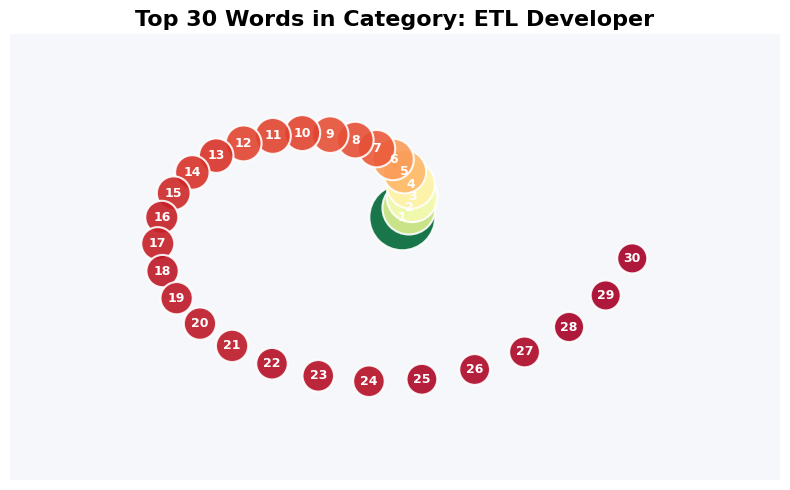

Legend for category: 10
 1. â¢ (560)
 2. data (368)
 3. etl (336)
 4. develop (304)
 5. informatica (240)
 6. use (216)
 7. sql (168)
 8. exprienc (160)
 9. project (160)
10. map (152)
11. job (152)
12. detail (152)
13. load (136)
14. test (136)
15. talend (128)
16. month (120)
17. compani (120)
18. descript (112)
19. system (112)
20. document (112)
21. â (112)
22. servic (104)
23. environ (104)
24. creat (104)
25. sourc (96)
26. unix (96)
27. busi (96)
28. transform (88)
29. server (88)
30. work (88)


In [42]:
import numpy as np
import matplotlib.pyplot as plt

cat = 10

plot_df = (
    top30_df[top30_df["Category"] == cat]
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)

n = len(plot_df)


angles = np.linspace(0, 2 * np.pi, n, endpoint=False)

radii = np.linspace(0.2, 1.0, n)

x = radii * np.cos(angles)
y = radii * np.sin(angles)


sizes = plot_df["Count"].values.astype(float)
sizes_scaled = 2000 * (sizes / sizes.max())**1.2 + 250
norm = (sizes - sizes.min()) / (sizes.max() - sizes.min() + 1e-9)
colors = plt.cm.RdYlGn(norm)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor("#f5f7fa")

sc = ax.scatter(
    x,
    y,
    s=sizes_scaled,
    c=colors,
    alpha=0.9,
    edgecolor="white",
    linewidth=1.5,
)
for i, (xi, yi) in enumerate(zip(x, y), start=1):
    ax.text(
        xi,
        yi,
        str(i),
        ha="center",
        va="center",
        fontsize=9,
        color="white",
        fontweight="bold",
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
ax.set_title(f"Top {n} Words in Category: {label_to_category[cat]}", fontsize=16, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()
print(f"Legend for category: {cat}")
for idx, row in plot_df.iterrows():
    print(f"{idx+1:2d}. {row['Word']} ({row['Count']})")

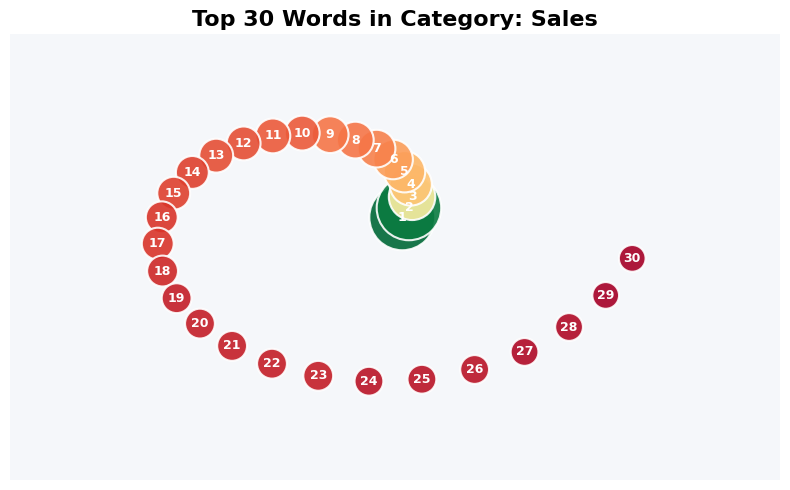

Legend for category: 22
 1. â¢ (416)
 2. sale (400)
 3. manag (208)
 4. exprienc (168)
 5. month (160)
 6. work (144)
 7. team (128)
 8. detail (120)
 9. compani (120)
10. skill (104)
11. market (104)
12. descript (96)
13. 6 (96)
14. 1 (88)
15. year (88)
16. lead (80)
17. gener (80)
18. ms (72)
19. offic (64)
20. colleg (64)
21. client (64)
22. target (64)
23. â¢ (64)
24. ltd (56)
25. cricket (56)
26. staff (56)
27. call (48)
28. meet (48)
29. less (40)
30. monthscompani (40)


In [43]:
import numpy as np
import matplotlib.pyplot as plt

cat = 22

plot_df = (
    top30_df[top30_df["Category"] == cat]
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)

n = len(plot_df)


angles = np.linspace(0, 2 * np.pi, n, endpoint=False)

radii = np.linspace(0.2, 1.0, n)

x = radii * np.cos(angles)
y = radii * np.sin(angles)


sizes = plot_df["Count"].values.astype(float)
sizes_scaled = 2000 * (sizes / sizes.max())**1.2 + 250
norm = (sizes - sizes.min()) / (sizes.max() - sizes.min() + 1e-9)
colors = plt.cm.RdYlGn(norm)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor("#f5f7fa")

sc = ax.scatter(
    x,
    y,
    s=sizes_scaled,
    c=colors,
    alpha=0.9,
    edgecolor="white",
    linewidth=1.5,
)
for i, (xi, yi) in enumerate(zip(x, y), start=1):
    ax.text(
        xi,
        yi,
        str(i),
        ha="center",
        va="center",
        fontsize=9,
        color="white",
        fontweight="bold",
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
ax.set_title(f"Top {n} Words in Category: {label_to_category[cat]}", fontsize=16, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()
print(f"Legend for category: {cat}")
for idx, row in plot_df.iterrows():
    print(f"{idx+1:2d}. {row['Word']} ({row['Count']})")

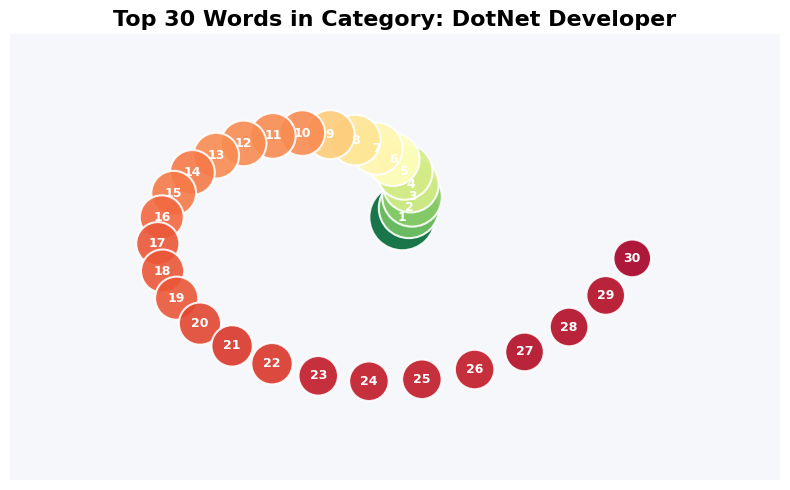

Legend for category: 9
 1. â¢ (208)
 2. exprienc (176)
 3. develop (172)
 4. month (152)
 5. project (152)
 6. net (136)
 7. manag (132)
 8. databas (124)
 9. sql (116)
10. server (100)
11. detail (100)
12. descript (100)
13. applic (100)
14. system (96)
15. aspnet (96)
16. 1 (92)
17. year (88)
18. use (88)
19. design (88)
20. less (84)
21. jqueri (80)
22. dot (80)
23. technolog (72)
24. work (72)
25. role (72)
26. layer (72)
27. mvc (68)
28. compani (68)
29. javascript (68)
30. pune (64)


In [63]:
import numpy as np
import matplotlib.pyplot as plt

cat = 9

plot_df = (
    top30_df[top30_df["Category"] == cat]
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)

n = len(plot_df)


angles = np.linspace(0, 2 * np.pi, n, endpoint=False)

radii = np.linspace(0.2, 1.0, n)

x = radii * np.cos(angles)
y = radii * np.sin(angles)


sizes = plot_df["Count"].values.astype(float)
sizes_scaled = 2000 * (sizes / sizes.max())**1.2 + 250
norm = (sizes - sizes.min()) / (sizes.max() - sizes.min() + 1e-9)
colors = plt.cm.RdYlGn(norm)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor("#f5f7fa")

sc = ax.scatter(
    x,
    y,
    s=sizes_scaled,
    c=colors,
    alpha=0.9,
    edgecolor="white",
    linewidth=1.5,
)
for i, (xi, yi) in enumerate(zip(x, y), start=1):
    ax.text(
        xi,
        yi,
        str(i),
        ha="center",
        va="center",
        fontsize=9,
        color="white",
        fontweight="bold",
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
ax.set_title(f"Top {n} Words in Category: {label_to_category[cat]}", fontsize=16, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()
print(f"Legend for category: {cat}")
for idx, row in plot_df.iterrows():
    print(f"{idx+1:2d}. {row['Word']} ({row['Count']})")

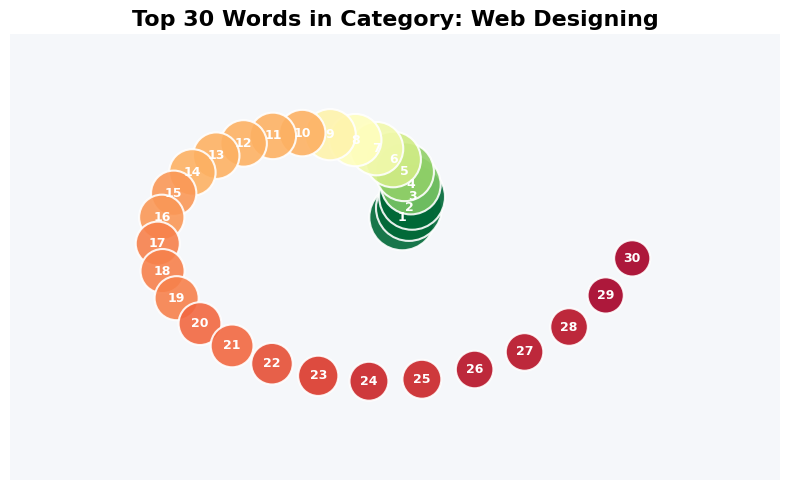

Legend for category: 24
 1. project (324)
 2. â (324)
 3. develop (324)
 4. applic (270)
 5. design (261)
 6. descript (234)
 7. use (216)
 8. web (207)
 9. exprienc (198)
10. technolog (162)
11. bootstrap (162)
12. detail (162)
13. month (162)
14. respons (162)
15. 1 (153)
16. requir (153)
17. softwar (144)
18. system (144)
19. compani (144)
20. jqueri (135)
21. websit (135)
22. role (126)
23. ui (117)
24. photoshop (108)
25. maharashtra (108)
26. team (99)
27. php (99)
28. databas (99)
29. html5 (90)
30. css3 (90)


In [64]:
import numpy as np
import matplotlib.pyplot as plt

cat = 24

plot_df = (
    top30_df[top30_df["Category"] == cat]
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)

n = len(plot_df)


angles = np.linspace(0, 2 * np.pi, n, endpoint=False)

radii = np.linspace(0.2, 1.0, n)

x = radii * np.cos(angles)
y = radii * np.sin(angles)


sizes = plot_df["Count"].values.astype(float)
sizes_scaled = 2000 * (sizes / sizes.max())**1.2 + 250
norm = (sizes - sizes.min()) / (sizes.max() - sizes.min() + 1e-9)
colors = plt.cm.RdYlGn(norm)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor("#f5f7fa")

sc = ax.scatter(
    x,
    y,
    s=sizes_scaled,
    c=colors,
    alpha=0.9,
    edgecolor="white",
    linewidth=1.5,
)
for i, (xi, yi) in enumerate(zip(x, y), start=1):
    ax.text(
        xi,
        yi,
        str(i),
        ha="center",
        va="center",
        fontsize=9,
        color="white",
        fontweight="bold",
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
ax.set_title(f"Top {n} Words in Category: {label_to_category[cat]}", fontsize=16, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()
print(f"Legend for category: {cat}")
for idx, row in plot_df.iterrows():
    print(f"{idx+1:2d}. {row['Word']} ({row['Count']})")

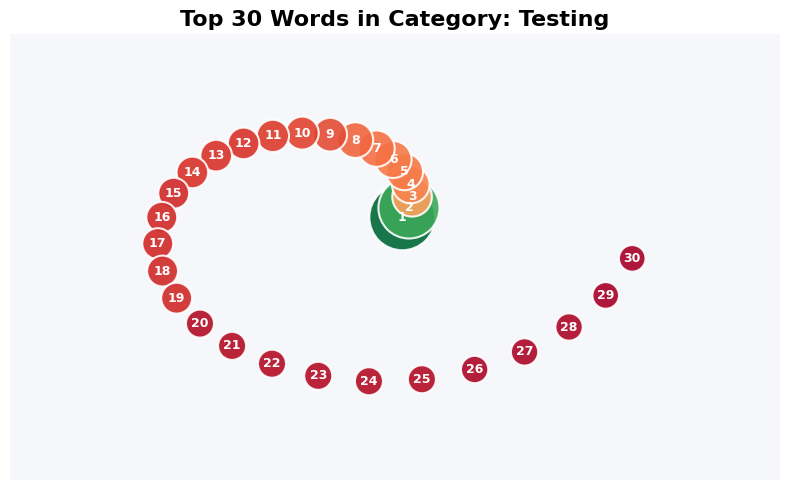

Legend for category: 23
 1. test (750)
 2. â¢ (650)
 3. detail (260)
 4. exprienc (230)
 5. engin (220)
 6. month (220)
 7. 6 (210)
 8. transform (200)
 9. maharashtra (170)
10. â (160)
11. system (150)
12. compani (140)
13. project (140)
14. check (140)
15. skill (130)
16. januari (130)
17. descript (130)
18. window (130)
19. qualiti (130)
20. electron (90)
21. ltd (90)
22. android (90)
23. applic (90)
24. work (90)
25. per (90)
26. 1 (80)
27. manag (80)
28. assembl (80)
29. pvt (70)
30. respons (70)


In [66]:
import numpy as np
import matplotlib.pyplot as plt

cat = 23

plot_df = (
    top30_df[top30_df["Category"] == cat]
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)

n = len(plot_df)


angles = np.linspace(0, 2 * np.pi, n, endpoint=False)

radii = np.linspace(0.2, 1.0, n)

x = radii * np.cos(angles)
y = radii * np.sin(angles)


sizes = plot_df["Count"].values.astype(float)
sizes_scaled = 2000 * (sizes / sizes.max())**1.2 + 250
norm = (sizes - sizes.min()) / (sizes.max() - sizes.min() + 1e-9)
colors = plt.cm.RdYlGn(norm)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor("#f5f7fa")

sc = ax.scatter(
    x,
    y,
    s=sizes_scaled,
    c=colors,
    alpha=0.9,
    edgecolor="white",
    linewidth=1.5,
)
for i, (xi, yi) in enumerate(zip(x, y), start=1):
    ax.text(
        xi,
        yi,
        str(i),
        ha="center",
        va="center",
        fontsize=9,
        color="white",
        fontweight="bold",
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
ax.set_title(f"Top {n} Words in Category: {label_to_category[cat]}", fontsize=16, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()
print(f"Legend for category: {cat}")
for idx, row in plot_df.iterrows():
    print(f"{idx+1:2d}. {row['Word']} ({row['Count']})")

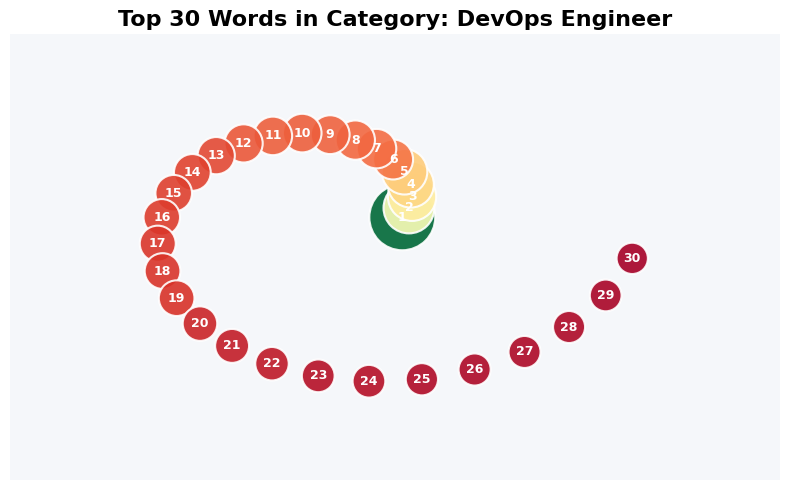

Legend for category: 8
 1. â¢ (784)
 2. project (473)
 3. exprienc (424)
 4. month (386)
 5. script (375)
 6. applic (278)
 7. team (270)
 8. develop (267)
 9. server (260)
10. deploy (256)
11. shell (255)
12. autom (249)
13. manag (234)
14. devops (226)
15. 1 (223)
16. build (222)
17. compani (214)
18. descript (210)
19. product (209)
20. mysql (191)
21. detail (182)
22. engin (175)
23. creat (164)
24. technolog (163)
25. support (156)
26. year (154)
27. less (153)
28. user (153)
29. softwar (149)
30. cloud (142)


In [67]:
import numpy as np
import matplotlib.pyplot as plt

cat = 8

plot_df = (
    top30_df[top30_df["Category"] == cat]
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)

n = len(plot_df)


angles = np.linspace(0, 2 * np.pi, n, endpoint=False)

radii = np.linspace(0.2, 1.0, n)

x = radii * np.cos(angles)
y = radii * np.sin(angles)


sizes = plot_df["Count"].values.astype(float)
sizes_scaled = 2000 * (sizes / sizes.max())**1.2 + 250
norm = (sizes - sizes.min()) / (sizes.max() - sizes.min() + 1e-9)
colors = plt.cm.RdYlGn(norm)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor("#f5f7fa")

sc = ax.scatter(
    x,
    y,
    s=sizes_scaled,
    c=colors,
    alpha=0.9,
    edgecolor="white",
    linewidth=1.5,
)
for i, (xi, yi) in enumerate(zip(x, y), start=1):
    ax.text(
        xi,
        yi,
        str(i),
        ha="center",
        va="center",
        fontsize=9,
        color="white",
        fontweight="bold",
    )

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(x.min() - 0.5, x.max() + 0.5)
ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
ax.set_title(f"Top {n} Words in Category: {label_to_category[cat]}", fontsize=16, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()
print(f"Legend for category: {cat}")
for idx, row in plot_df.iterrows():
    print(f"{idx+1:2d}. {row['Word']} ({row['Count']})")

In [44]:
df.head()

,Category,Resume
0,6,skill program languag python panda numpi scipi...
1,6,educ detail may 2013 may 2017 uitrgpv data sci...
2,6,area interest deep learn control system design...
3,6,skill â¢ r â¢ python â¢ sap hana â¢ tablea...
4,6,educ detail mca ymcaust faridabad haryana data...


In [45]:

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


ps = PorterStemmer()

protected_words = {
    "python","java","javascript","c++","c#","html","html5","css","sql",
    "mysql","mongodb","react","nodejs","django","flask","tensorflow",
    "pytorch","keras","nlp","ai","ml","devops","aws","azure","gcp",
    "linux","docker","kubernetes"
}


def resume_stemming(text):

    if text is None:
        text = ""
    text = str(text)

    tokens = word_tokenize(text.lower())

    stemmed = []
    for w in tokens:
        if w in protected_words:
            stemmed.append(w)
        else:
            stemmed.append(ps.stem(w))

    return " ".join(stemmed)



df["Resume"] = df["Resume"].astype(str)

df["Resume"] = df["Resume"].apply(resume_stemming)


df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Category,Resume
0,6,skill program languag python panda numpi scipi...
1,6,educ detail may 2013 may 2017 uitrgpv data sci...
2,6,area interest deep learn control system design...
3,6,skill â¢ r â¢ python â¢ sap hana â¢ tablea...
4,6,educ detail mca ymcaust faridabad haryana data...


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["Resume"] = df["Resume"].fillna("").astype(str)

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words=None,
    token_pattern=r"(?u)\b[\w\+\#\.]+\b"
)

X = tfidf.fit_transform(df["Resume"])

print("TF-IDF Matrix Shape:", X.shape)



TF-IDF Matrix Shape: (962, 5000)


In [47]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,df["Category"],test_size=0.2,random_state=42)



In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=7,
    weights="distance",
    metric="cosine",
    algorithm="brute"
)

from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_norm = norm.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, df['Category'], test_size=0.3, random_state=42, stratify=df['Category']
)

knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', metric='cosine', n_neighbors=7,
                     weights='distance')

In [49]:
knn_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, knn_pred))

Accuracy: 0.9965397923875432


In [50]:
knn_pred = knn.predict(X_train)
print("Accuracy:", accuracy_score(y_train,knn_pred))

Accuracy: 1.0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)




LogisticRegression(max_iter=2000)

In [52]:
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9930795847750865


In [53]:
print("Accuracy:", model.score(X_train, y_train))

Accuracy: 0.9955423476968797


In [54]:

y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)
print("Difference       :", abs(train_acc - test_acc))

Training Accuracy: 0.9955423476968797
Testing Accuracy : 0.9930795847750865
Difference       : 0.002462762921793149


In [55]:

y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall   :", recall_score(y_test, y_pred, average="weighted"))
print("F1 Score :", f1_score(y_test, y_pred, average="weighted"))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy : 0.9930795847750865
Precision: 0.9935828877005347
Recall   : 0.9930795847750865
F1 Score : 0.9930431102005729

Confusion Matrix:
 [[ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  7  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  

In [56]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, df['Category'], cv=5)
print(cv_scores)
print("Mean CV Score:", cv_scores.mean())


[0.97409326 1.         0.99479167 1.         1.        ]
Mean CV Score: 0.9937769861830741


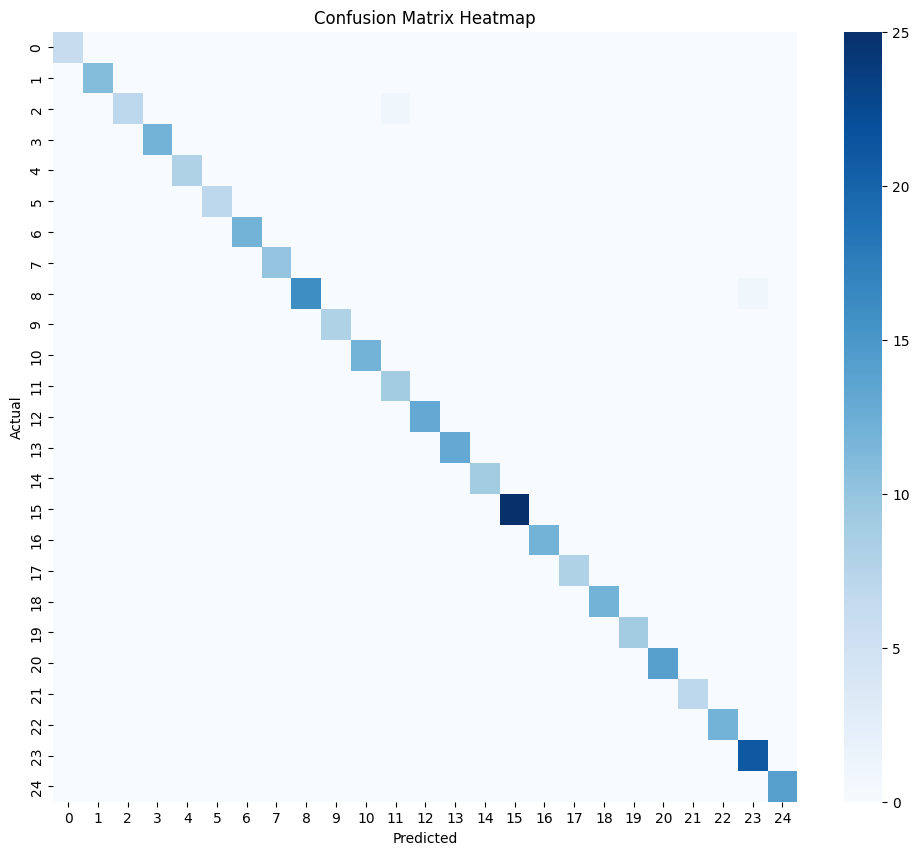

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [58]:
def predict_resume(text):
    text = resume_stemming(text)
    vector = tfidf.transform([text])
    pred = model.predict(vector)[0]
    return pred

print(predict_resume("Experienced SQL developer with Python and Flask"))


20


In [59]:
import random

def test_random_resume(n=5):
    for i in range(n):
        idx = random.randint(0, len(df)-1)

        text = df["Resume"].iloc[idx]
        actual = df["Category"].iloc[idx]
        processed = resume_stemming(text)

        vec = tfidf.transform([processed])
        pred = model.predict(vec)[0]

        print("----- Test", i+1, "-----")
        print("Resume Text:\n", text[:300], "...")
        print("\nActual Category:", actual)
        print(label_to_category[actual])
        print("Predicted Category:", pred)
        print(label_to_category[pred])
        print("----------------------\n")


In [60]:
test_random_resume(5)


----- Test 1 -----
Resume Text:
 skill set hadoop map reduc hdf hive sqoop java durat 2016 2017 role hadoop develop rplu offer quick simpl power cloud base solut demand sen accur predict demand product market combin enterpri extern data predict demand accur use social conver sentiment deriv demand identifi signif driver sale hord f ...

Actual Category: 13
Hadoop
Predicted Category: 13
Hadoop
----------------------

----- Test 2 -----
Resume Text:
 â¢ good commun skill â¢ quick learner â¢ keen find solutionseduc detail mba market intern busi manag pune maharashtra pune univ btech tech nagpur maharashtra rtm nagpur univ gm art commerc scienc gm art commerc scienc skill detail compani detail compani samarth colleg descript engin 30 7 210 5 co ...

Actual Category: 1
Arts
Predicted Category: 1
Arts
----------------------

----- Test 3 -----
Resume Text:
 core compet ant maven git bitbucket jenkin linux ansibl shell script requir gather continu integr continu deploy softwar develop life

In [61]:
text='Sales Executive experienced in lead generation, customer handling, CRM tools, and achieving monthly sales targets. Strong communication skills.'



text=clean_resume_text(text)
text=remove_stopwords(text)
text=resume_stemming(text)
processed = resume_stemming(text)
vec = tfidf.transform([processed])
pred = model.predict(vec)[0]
print(label_to_category[pred])

Sales


In [62]:
import pickle


with open("resume_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("knnmodel.pkl", "wb") as f:
    pickle.dump(knn, f)


with open("resume_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("resume_label_mapping.pkl", "wb") as f:
    pickle.dump(label_to_category, f)
